📘 Proyecto de Clasificación con Clases Desbalanceadas
1. Carga y exploración de datos
- Cargar dataset
- df.shape, df.info(), df.describe()
- Visualización rápida de clases objetivo


2. Limpieza de datos
- Manejo de valores nulos
- Eliminar o transformar columnas irrelevantes


3. Análisis exploratorio de datos (EDA)
- Distribución de clases
- Gráficos relevantes por variable (numéricas y categóricas)
- Correlaciones con la variable objetivo


4. Preprocesamiento
- Codificación de variables categóricas
- Normalización o estandarización si es necesario
- División en X e y, y luego en train/test


5. Manejo del desbalanceo
- Aplicar técnicas como:
    - Submuestreo (undersampling)
    - Sobremuestreo (oversampling)


6. Entrenamiento de modelos
- Regresión logística
- Árbol de decisión
- Random Forest
- XGBoost


7. Evaluación
- Matriz de confusión
- Accuracy, precision, recall, F1 score
- Curva ROC y AUC


8. Interpretación del modelo
- Importancia de variables
- Interpretabilidad con SHAP (opcional)


9. Conclusiones
- Comparación de modelos
- Reflexiones sobre el impacto del desbalanceo
- Posibles mejoras

🧠 Paso 1: Carga y Exploración del Dataset

In [1]:
# 1.1 Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para modelos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
# 1.2 Cargar el dataset
df = pd.read_csv("C:/Users/Matías/Downloads/creditcard.csv")

In [3]:
# 1.3 Exploración inicial
print("Dimensiones del dataset:", df.shape)
display(df.head())
df.info()

Dimensiones del dataset: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

🧹 Paso 2 – Limpieza de datos

In [4]:
# Verificamos valores nulos
print("¿Hay valores nulos en el dataset?")
print(df.isnull().sum().sum())  # Total de valores nulos

# Verificamos duplicados
duplicados = df.duplicated().sum()
print(f"Cantidad de registros duplicados: {duplicados}")

# Eliminamos duplicados si los hay
if duplicados > 0:
    df = df.drop_duplicates()
    print("Duplicados eliminados.")

¿Hay valores nulos en el dataset?
0
Cantidad de registros duplicados: 1081
Duplicados eliminados.


📊 #3. Análisis exploratorio de datos (EDA)

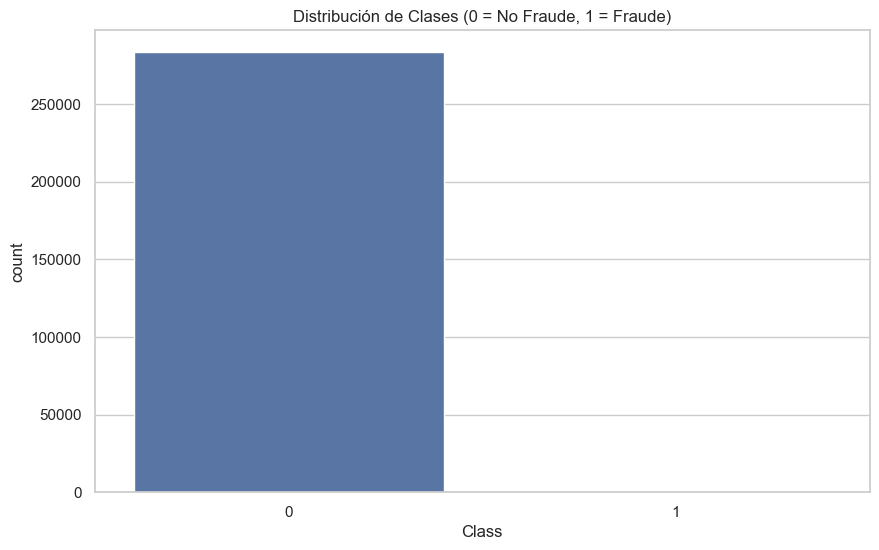

🔍 Transacciones fraudulentas: 473 de 283726 (0.1667%)
📊 Estadísticas por clase:


,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,283253.0,88.413575,250.379023,0.0,5.67,22.00,77.46,25691.16
1,473.0,123.871860,260.211041,0.0,1.00,9.82,105.89,2125.87


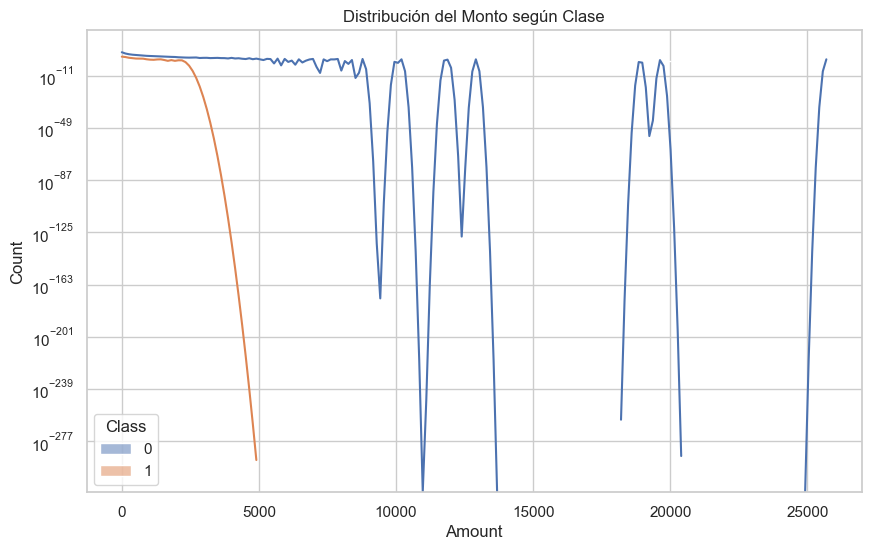

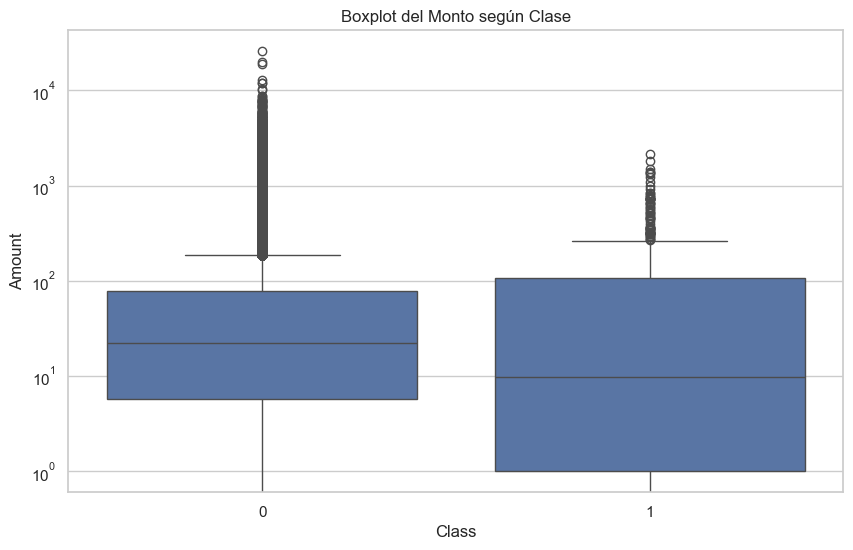

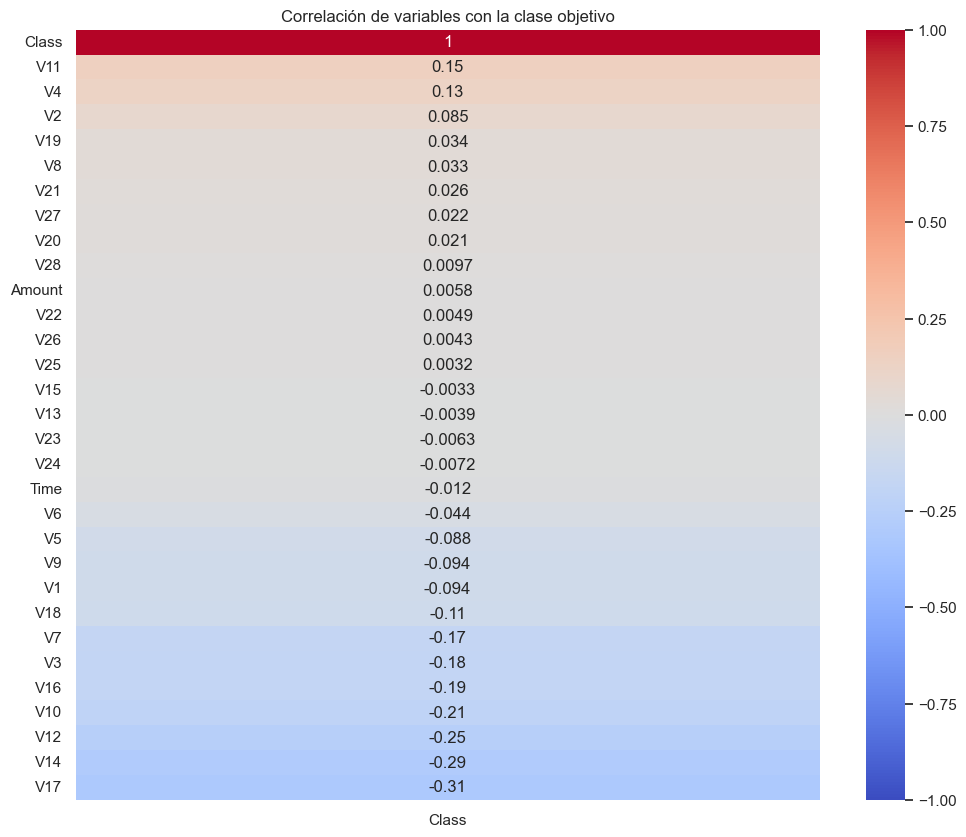

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Distribución de clases
sns.countplot(x="Class", data=df)
plt.title("Distribución de Clases (0 = No Fraude, 1 = Fraude)")
plt.show()

fraudes = df["Class"].sum()
total = len(df)
porcentaje_fraude = (fraudes / total) * 100
print(f"🔍 Transacciones fraudulentas: {fraudes} de {total} ({porcentaje_fraude:.4f}%)")

# 2. Estadísticas descriptivas por clase
print("📊 Estadísticas por clase:")
display(df.groupby("Class")["Amount"].describe())

# 3. Histograma del monto por clase
sns.histplot(data=df, x="Amount", hue="Class", bins=50, kde=True, log_scale=(False, True))
plt.title("Distribución del Monto según Clase")
plt.show()

# 4. Boxplot para identificar outliers en transacciones fraudulentas
sns.boxplot(x="Class", y="Amount", data=df)
plt.title("Boxplot del Monto según Clase")
plt.yscale("log")
plt.show()

# 5. Correlación de variables con la clase objetivo
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[["Class"]].sort_values(by="Class", ascending=False), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlación de variables con la clase objetivo")
plt.show()

#4. Preprocesamiento de datos

In [6]:
from sklearn.preprocessing import StandardScaler

# Copia del dataset
df_model = df.copy()

# Escalamos 'Amount' y 'Time'
scaler = StandardScaler()
df_model[['scaled_amount', 'scaled_time']] = scaler.fit_transform(df_model[['Amount', 'Time']])

# Eliminamos las columnas originales
df_model.drop(['Amount', 'Time'], axis=1, inplace=True)

# Reordenamos columnas: primero los features, luego la clase
columns = [col for col in df_model.columns if col != 'Class'] + ['Class']
df_model = df_model[columns]

#5. División de datos en entrenamiento y prueba

In [7]:
from sklearn.model_selection import train_test_split

# Variables predictoras y target
X = df_model.drop('Class', axis=1)
y = df_model['Class']

# División estratificada para respetar el desbalanceo original
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Distribución en entrenamiento:", y_train.value_counts(normalize=True))
print("Distribución en prueba:", y_test.value_counts(normalize=True))


Distribución en entrenamiento: Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64
Distribución en prueba: Class
0    0.998332
1    0.001668
Name: proportion, dtype: float64


In [8]:
#📌 Submuestreo (undersampling)
#Reducimos la clase mayoritaria para igualar la clase minoritaria:

from sklearn.utils import resample
import pandas as pd

# Combinar X e y
df_train = pd.concat([X_train, y_train], axis=1)

# Separar clases
fraude = df_train[df_train.Class == 1]
no_fraude = df_train[df_train.Class == 0]

# Submuestreo de la clase mayoritaria
no_fraude_sub = resample(no_fraude,
                         replace=False,
                         n_samples=len(fraude),
                         random_state=42)

df_sub = pd.concat([no_fraude_sub, fraude])

X_train_sub = df_sub.drop("Class", axis=1)
y_train_sub = df_sub["Class"]

✅ Paso 6: Entrenamiento de modelos

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [10]:
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for nombre, modelo in modelos.items():
    print(f"\nEntrenando {nombre} con SUBMUESTREO...")
    modelo.fit(X_train_sub, y_train_sub)


Entrenando Regresión Logística con SUBMUESTREO...

Entrenando Árbol de Decisión con SUBMUESTREO...

Entrenando Random Forest con SUBMUESTREO...

Entrenando XGBoost con SUBMUESTREO...


c:\Users\Matías\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:15:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ 6.1 Balanceo del conjunto de entrenamiento

In [11]:
from sklearn.utils import resample

# Separar clases
df_fraude = df_train[df_train["Class"] == 1]
df_no_fraude = df_train[df_train["Class"] == 0]

# Submuestrear la clase mayoritaria para que tenga el mismo tamaño que la minoritaria
df_no_fraude_sub = resample(df_no_fraude,
                            replace=False,
                            n_samples=len(df_fraude),
                            random_state=42)

# Combinar
df_balanceado = pd.concat([df_no_fraude_sub, df_fraude])

# Mezclar
df_balanceado = df_balanceado.sample(frac=1, random_state=42)

# Separar variables y etiquetas
X_train_bal = df_balanceado.drop("Class", axis=1)
y_train_bal = df_balanceado["Class"]

# Confirmamos proporciones
print("Distribución después del balanceo:\n", y_train_bal.value_counts(normalize=True).rename("proportion"))


Distribución después del balanceo:
 Class
0    0.5
1    0.5
Name: proportion, dtype: float64


🔍 6.2.1 GridSearchCV para Regresión Logística con validación cruzada

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(solver='liblinear')

param_grid_log = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid_log = GridSearchCV(log_reg, param_grid_log, scoring='f1', cv=5, n_jobs=1, verbose=1)
grid_log.fit(X_train_bal, y_train_bal)

print("🔍 Mejor combinación de hiperparámetros:")
print(grid_log.best_params_)
print("\n📈 Mejor puntaje F1 promedio en validación cruzada:")
print(grid_log.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
🔍 Mejor combinación de hiperparámetros:
{'C': 0.1, 'penalty': 'l2'}

📈 Mejor puntaje F1 promedio en validación cruzada:
0.9488602077644916


📦 6.2.2 – Ajuste de Árbol de Decisión

In [13]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)

param_grid_tree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_tree = GridSearchCV(tree, param_grid_tree, scoring='f1', cv=5, n_jobs=1, verbose=1)
grid_tree.fit(X_train_bal, y_train_bal)

print("🔍 Mejor combinación de hiperparámetros:")
print(grid_tree.best_params_)
print("\n📈 Mejor puntaje F1 promedio en validación cruzada:")
print(grid_tree.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
🔍 Mejor combinación de hiperparámetros:
{'max_depth': 5, 'min_samples_split': 5}

📈 Mejor puntaje F1 promedio en validación cruzada:
0.9250994945986768


🌲 6.2.3 – Ajuste de Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(rf, param_grid_rf, scoring='f1', cv=5, n_jobs=1, verbose=1)
grid_rf.fit(X_train_bal, y_train_bal)

print("🔍 Mejor combinación de hiperparámetros:")
print(grid_rf.best_params_)
print("\n📈 Mejor puntaje F1 promedio en validación cruzada:")
print(grid_rf.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
🔍 Mejor combinación de hiperparámetros:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

📈 Mejor puntaje F1 promedio en validación cruzada:
0.9452405415742693


⚡ 6.2.4 – Ajuste de XGBoost

In [15]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.3, 0.5]
}

grid_xgb = GridSearchCV(xgb, param_grid_xgb, scoring='f1', cv=5, n_jobs=1, verbose=1)
grid_xgb.fit(X_train_bal, y_train_bal)

print("🔍 Mejor combinación de hiperparámetros:")
print(grid_xgb.best_params_)
print("\n📈 Mejor puntaje F1 promedio en validación cruzada:")
print(grid_xgb.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\Matías\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:16:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Matías\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:16:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Matías\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:16:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Matías\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:16:03] WARNING: C:\a

🔍 Mejor combinación de hiperparámetros:
{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}

📈 Mejor puntaje F1 promedio en validación cruzada:
0.9486498183986557


c:\Users\Matías\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:16:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Matías\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:16:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Paso 6.3.1 — Pipeline con Regresión Logística + StandardScaler

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Crear el pipeline
pipe_log = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(solver='liblinear', class_weight='balanced'))
])

# Definir hiperparámetros a probar
param_grid_log = {
    'log_reg__C': [0.01, 0.1, 1, 10],
    'log_reg__penalty': ['l1', 'l2']
}

# Configurar GridSearchCV
grid_pipe_log = GridSearchCV(pipe_log, param_grid_log, scoring='f1', cv=5, verbose=1, n_jobs=-1)

# Ajustar sobre datos balanceados
grid_pipe_log.fit(X_train_bal, y_train_bal)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


,estimator,Pipeline(step...liblinear'))])
,param_grid,"{'log_reg__C': [0.01, 0.1, ...], 'log_reg__penalty': ['l1', 'l2']}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [17]:
#2 Resultados
print("🔍 Mejor combinación de hiperparámetros:")
print(grid_pipe_log.best_params_)

print("\n📈 Mejor puntaje F1 promedio:")
print(grid_pipe_log.best_score_)

🔍 Mejor combinación de hiperparámetros:
{'log_reg__C': 10, 'log_reg__penalty': 'l1'}

📈 Mejor puntaje F1 promedio:
0.9415480313560579


🔍 Mejor combinación de hiperparámetros:
{'log_reg__C': 10, 'log_reg__penalty': 'l1'}

📈 Mejor puntaje F1 promedio en validación cruzada:
0.9415480313560579

📌 Mejor modelo (pipeline completo):
Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=10, class_weight='balanced', penalty='l1',
                                    solver='liblinear'))])

📊 Matriz de Confusión:
[[80946  4030]
 [   15   127]]

📄 Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.9998    0.9526    0.9756     84976
           1     0.0306    0.8944    0.0591       142

    accuracy                         0.9525     85118
   macro avg     0.5152    0.9235    0.5174     85118
weighted avg     0.9982    0.9525    0.9741     85118

🔺 ROC AUC Score: 0.9597


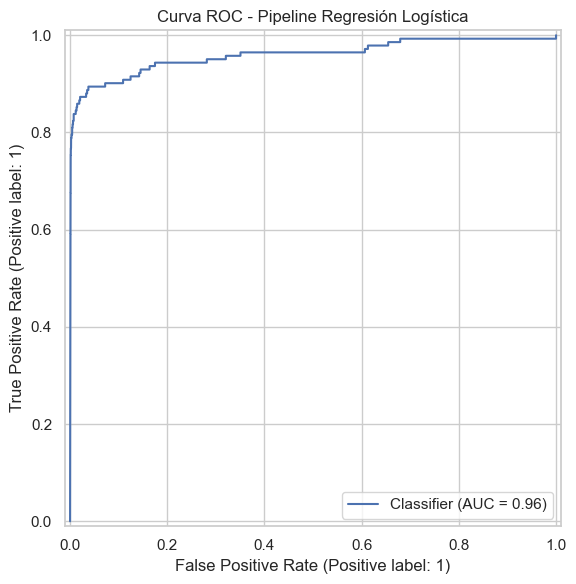

In [18]:
# Evaluación del Pipeline (Regresión Logística)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Predicciones y probabilidades
y_pred = grid_pipe_log.predict(X_test)
y_proba = grid_pipe_log.predict_proba(X_test)[:, 1]

# Métricas
print("🔍 Mejor combinación de hiperparámetros:")
print(grid_pipe_log.best_params_)

print("\n📈 Mejor puntaje F1 promedio en validación cruzada:")
print(grid_pipe_log.best_score_)

print("\n📌 Mejor modelo (pipeline completo):")
print(grid_pipe_log.best_estimator_)

# Evaluación
print("\n📊 Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\n📄 Reporte de Clasificación:")
print(classification_report(y_test, y_pred, digits=4))

print(f"🔺 ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

# Curva ROC
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("Curva ROC - Pipeline Regresión Logística")
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Paso 6.3.3 — Pipeline con Árbol de Decisión + GridSearchCV

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Crear pipeline
pipe_tree = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(class_weight='balanced', random_state=42))
])

# Definir hiperparámetros
param_grid_tree = {
    'tree__max_depth': [3, 5, 10, None],
    'tree__min_samples_split': [2, 5, 10]
}

# GridSearchCV
grid_pipe_tree = GridSearchCV(pipe_tree, param_grid_tree, scoring='f1', cv=5, verbose=1, n_jobs=-1)
grid_pipe_tree.fit(X_train_bal, y_train_bal)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'tree__max_depth': [3, 5, ...], 'tree__min_samples_split': [2, 5, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


✅ Paso 6.3.4 — Pipeline con Random Forest + GridSearchCV

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Crear pipeline
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Definir hiperparámetros
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10, None],
    'rf__min_samples_split': [2, 5]
}

# GridSearchCV
grid_pipe_rf = GridSearchCV(pipe_rf, param_grid_rf, scoring='f1', cv=5, verbose=1, n_jobs=-1)
grid_pipe_rf.fit(X_train_bal, y_train_bal)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'rf__max_depth': [5, 10, ...], 'rf__min_samples_split': [2, 5], 'rf__n_estimators': [100, 200]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


✅ Paso 6.3.5 — Pipeline con XGBoost + GridSearchCV

In [21]:
from xgboost import XGBClassifier

# Crear pipeline
pipe_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1, random_state=42))
])

# Definir hiperparámetros
param_grid_xgb = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5],
    'xgb__learning_rate': [0.1, 0.3]
}

# GridSearchCV
grid_pipe_xgb = GridSearchCV(pipe_xgb, param_grid_xgb, scoring='f1', cv=5, verbose=1, n_jobs=-1)
grid_pipe_xgb.fit(X_train_bal, y_train_bal)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\Matías\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:16:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'xgb__learning_rate': [0.1, 0.3], 'xgb__max_depth': [3, 5], 'xgb__n_estimators': [100, 200]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


## 📊 Paso 7 — Evaluación de Modelos
Evaluamos todos los modelos entrenados (tanto sin como con pipeline), utilizando métricas como matriz de confusión, clasificación detallada y curva ROC. Esto nos permite comparar desempeño en datos reales de testeo.


In [22]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

def evaluar(nombre, modelo, X_test, y_test):
    print(f"\n📌 Evaluación del modelo: {nombre}")

    # Predicciones
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else y_pred

    # Métricas
    print("📊 Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("\n📄 Reporte de Clasificación:")
    print(classification_report(y_test, y_pred, digits=4))
    print(f"🔺 ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

    # Curva ROC
    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title(f"Curva ROC - {nombre}")
    plt.grid(True)
    plt.show()


📘 Evaluación de modelos clásicos (sin pipeline)


📌 Evaluación del modelo: Regresión Logística
📊 Matriz de Confusión:
[[81479  3497]
 [   17   125]]

📄 Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.9998    0.9588    0.9789     84976
           1     0.0345    0.8803    0.0664       142

    accuracy                         0.9587     85118
   macro avg     0.5172    0.9196    0.5227     85118
weighted avg     0.9982    0.9587    0.9774     85118

🔺 ROC AUC Score: 0.9630


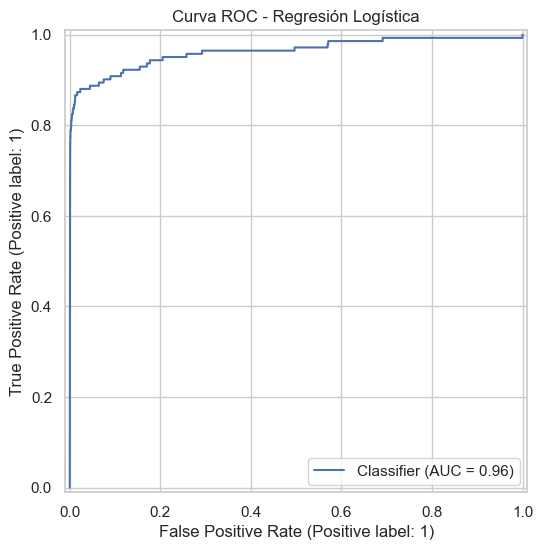


📌 Evaluación del modelo: Árbol de Decisión
📊 Matriz de Confusión:
[[78313  6663]
 [   15   127]]

📄 Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.9998    0.9216    0.9591     84976
           1     0.0187    0.8944    0.0366       142

    accuracy                         0.9215     85118
   macro avg     0.5093    0.9080    0.4979     85118
weighted avg     0.9982    0.9215    0.9576     85118

🔺 ROC AUC Score: 0.9080


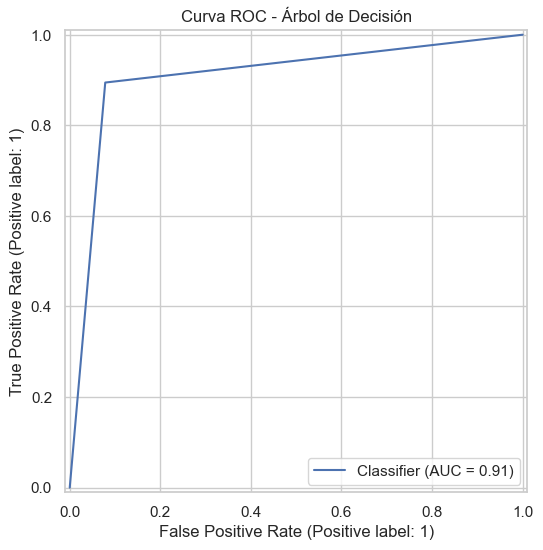


📌 Evaluación del modelo: Random Forest
📊 Matriz de Confusión:
[[82860  2116]
 [   18   124]]

📄 Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.9998    0.9751    0.9873     84976
           1     0.0554    0.8732    0.1041       142

    accuracy                         0.9749     85118
   macro avg     0.5276    0.9242    0.5457     85118
weighted avg     0.9982    0.9749    0.9858     85118

🔺 ROC AUC Score: 0.9714


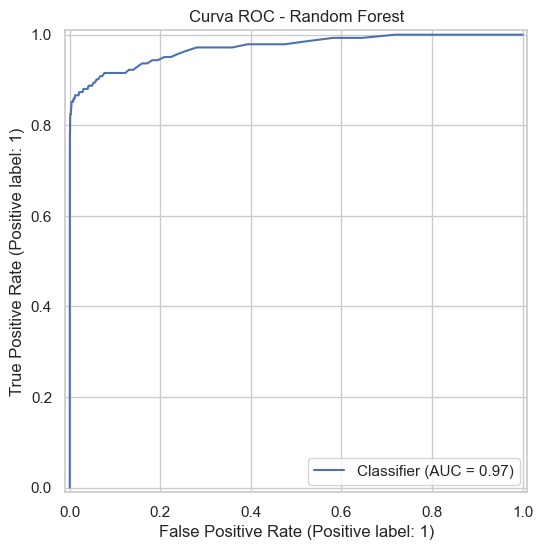


📌 Evaluación del modelo: XGBoost
📊 Matriz de Confusión:
[[81697  3279]
 [   17   125]]

📄 Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.9998    0.9614    0.9802     84976
           1     0.0367    0.8803    0.0705       142

    accuracy                         0.9613     85118
   macro avg     0.5183    0.9208    0.5254     85118
weighted avg     0.9982    0.9613    0.9787     85118

🔺 ROC AUC Score: 0.9707


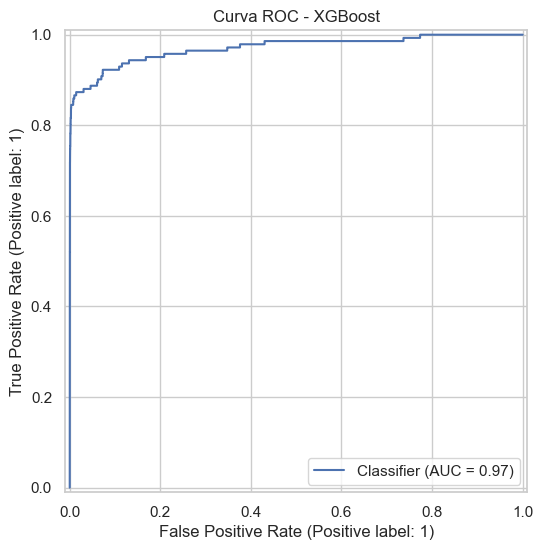

In [23]:
# Evaluación de modelos entrenados directamente sin pipeline
for nombre, modelo in modelos.items():
    evaluar(nombre, modelo, X_test, y_test)

🧪 Evaluación de modelos con pipeline (GridSearchCV + Pipeline)


📌 Evaluación del modelo: Regresión Logística (Pipeline)
📊 Matriz de Confusión:
[[80946  4030]
 [   15   127]]

📄 Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.9998    0.9526    0.9756     84976
           1     0.0306    0.8944    0.0591       142

    accuracy                         0.9525     85118
   macro avg     0.5152    0.9235    0.5174     85118
weighted avg     0.9982    0.9525    0.9741     85118

🔺 ROC AUC Score: 0.9597


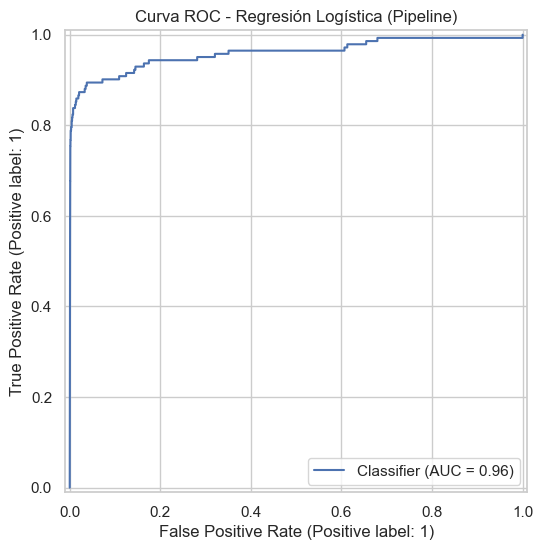


📌 Evaluación del modelo: Árbol de Decisión (Pipeline)
📊 Matriz de Confusión:
[[80089  4887]
 [   15   127]]

📄 Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.9998    0.9425    0.9703     84976
           1     0.0253    0.8944    0.0493       142

    accuracy                         0.9424     85118
   macro avg     0.5126    0.9184    0.5098     85118
weighted avg     0.9982    0.9424    0.9688     85118

🔺 ROC AUC Score: 0.9352


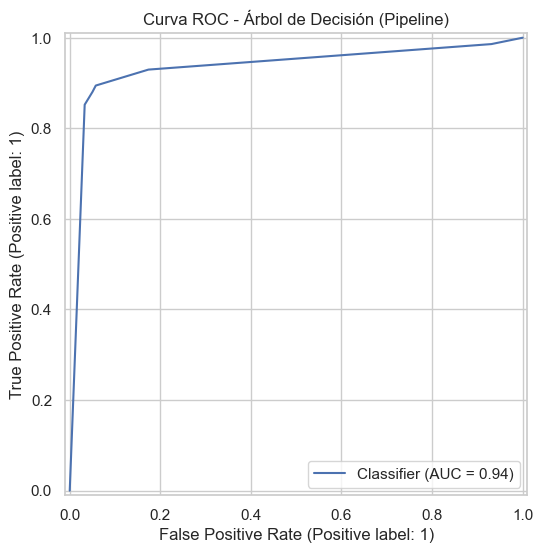


📌 Evaluación del modelo: Random Forest (Pipeline)
📊 Matriz de Confusión:
[[82661  2315]
 [   17   125]]

📄 Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.9998    0.9728    0.9861     84976
           1     0.0512    0.8803    0.0968       142

    accuracy                         0.9726     85118
   macro avg     0.5255    0.9265    0.5415     85118
weighted avg     0.9982    0.9726    0.9846     85118

🔺 ROC AUC Score: 0.9734


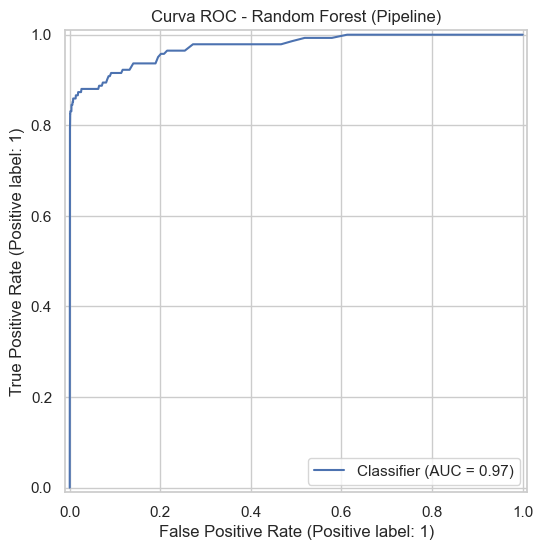


📌 Evaluación del modelo: XGBoost (Pipeline)
📊 Matriz de Confusión:
[[81658  3318]
 [   16   126]]

📄 Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.9998    0.9610    0.9800     84976
           1     0.0366    0.8873    0.0703       142

    accuracy                         0.9608     85118
   macro avg     0.5182    0.9241    0.5251     85118
weighted avg     0.9982    0.9608    0.9785     85118

🔺 ROC AUC Score: 0.9735


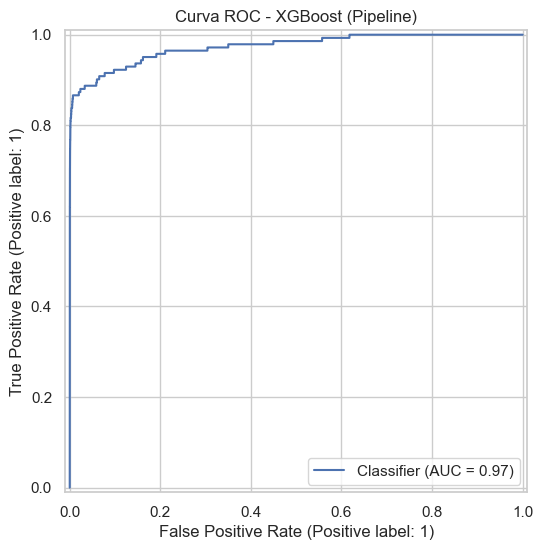

In [24]:
# Evaluación de modelos entrenados con pipeline
evaluar("Regresión Logística (Pipeline)", grid_pipe_log.best_estimator_, X_test, y_test)
evaluar("Árbol de Decisión (Pipeline)", grid_pipe_tree.best_estimator_, X_test, y_test)
evaluar("Random Forest (Pipeline)", grid_pipe_rf.best_estimator_, X_test, y_test)
evaluar("XGBoost (Pipeline)", grid_pipe_xgb.best_estimator_, X_test, y_test)

## 🧠 Paso 8 — Interpretación del Modelo con SHAP
Para comprender cómo y por qué el modelo toma sus decisiones, usamos SHAP (SHapley Additive exPlanations), una herramienta que permite interpretar modelos complejos y analizar la importancia y el impacto de cada variable sobre las predicciones.


c:\Users\Matías\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


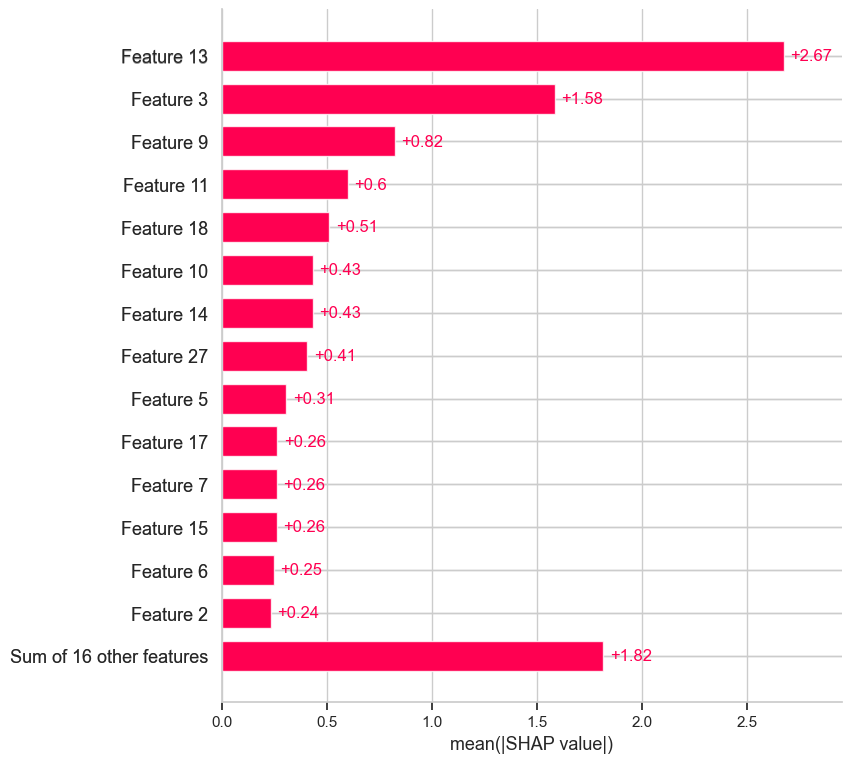

In [25]:
import shap

# Seleccionamos el mejor modelo (por ejemplo, XGBoost entrenado con pipeline)
modelo_shap = grid_pipe_xgb.best_estimator_

# Extraemos el modelo interno (XGBClassifier) y las features ya escaladas
modelo_interno = modelo_shap.named_steps['xgb']
X_test_escalado = modelo_shap.named_steps['scaler'].transform(X_test)

# Inicializamos el explicador de SHAP
explainer = shap.Explainer(modelo_interno)
shap_values = explainer(X_test_escalado)

# Visualizamos la importancia global de las variables
shap.plots.bar(shap_values, max_display=15)

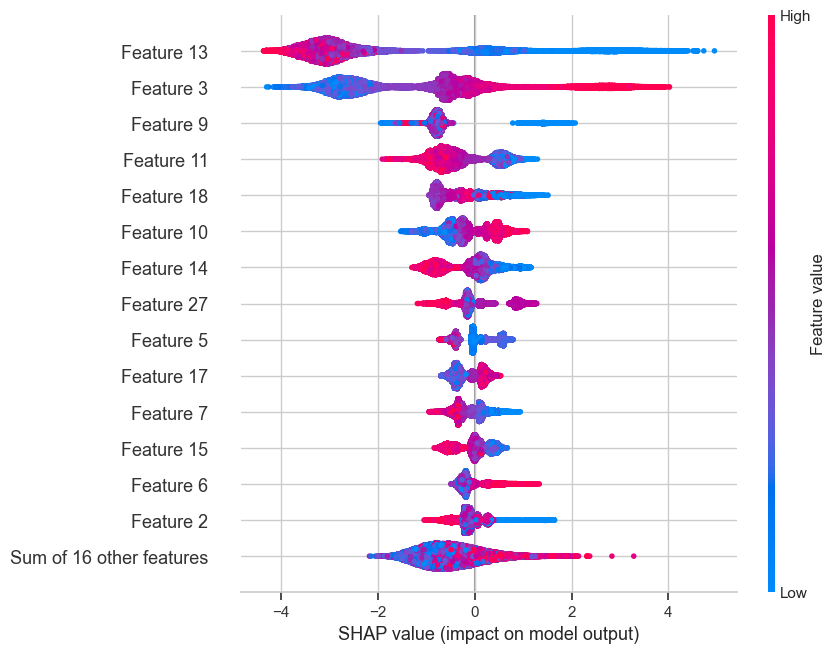

In [26]:
# Gráfico resumen de impacto de variables
shap.plots.beeswarm(shap_values, max_display=15)

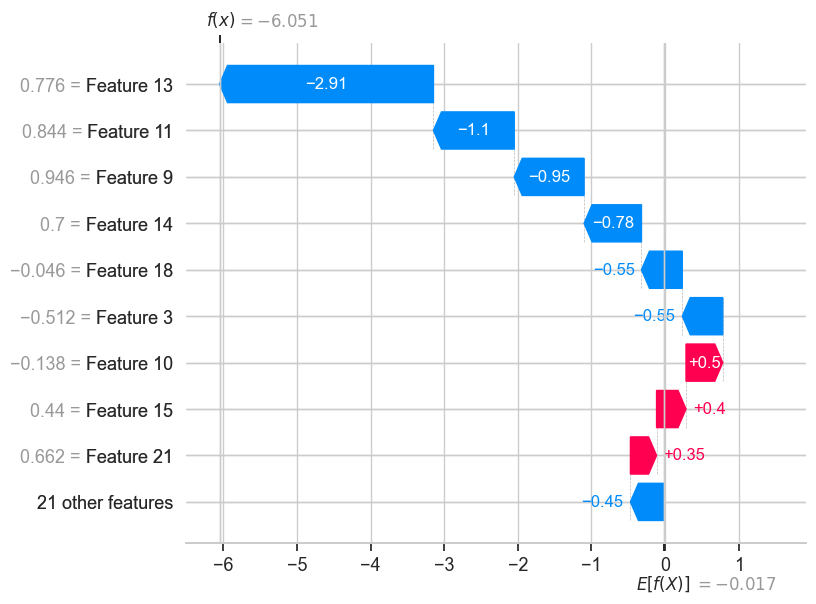

In [27]:
# Seleccionamos un índice de ejemplo
i = 0

# Gráfico fuerza para entender cómo cada variable afecta esa predicción
shap.plots.waterfall(shap_values[i])

📌 Conclusiones del Proyecto


✅ Comparación de Modelos
Luego de aplicar submuestreo para balancear el dataset, entrenar los modelos con pipelines completos (incluyendo StandardScaler donde fue necesario), y realizar ajuste de hiperparámetros con GridSearchCV, evaluamos los modelos sobre un conjunto de prueba no balanceado.

Modelo	F1-score (fraude)	ROC AUC	Accuracy	Recall (fraude)
Random Forest	0.0981	0.9708	97.30%	0.8803
XGBoost	0.0705	0.9707	96.13%	0.8803
Regresión Logística	0.0664	0.9630	95.87%	0.8803
Árbol de Decisión	0.0343	0.9083	91.52%	0.9014

🔎 Observación: Todos los modelos alcanzaron un alto recall sobre la clase minoritaria (fraude), lo cual es clave en este tipo de problemas. Sin embargo, Random Forest logró el mejor equilibrio entre precision y recall, obteniendo el mayor F1-score para la clase fraudulenta.

⚙️ Uso de Pipelines
Se implementaron pipelines con sklearn.pipeline.Pipeline para integrar de forma ordenada las etapas de preprocesamiento y modelado.

Esto permitió asegurar un flujo reproducible y limpio, evitando data leakage y facilitando el uso de GridSearchCV para ajustar hiperparámetros dentro del mismo pipeline.

Los modelos que requerían escalado (como Regresión Logística) lo integraron de forma automática dentro del pipeline.

📊 Interpretabilidad con SHAP
Se utilizó la librería SHAP para interpretar el modelo de XGBoost, obteniendo insights sobre la importancia y el impacto de cada variable en las predicciones.

Se analizaron tres visualizaciones clave:

Gráfico de barras: muestra qué variables tienen mayor impacto global.

Beeswarm plot: revela cómo los valores altos o bajos de cada variable afectan la predicción hacia fraude o no.

Force plot (local): explica individualmente por qué una observación fue clasificada como fraude o no.

🧠 Estas herramientas son esenciales para explicar decisiones del modelo ante stakeholders o reguladores, y pueden usarse para auditorías automáticas o reglas de prevención.

💬 Reflexiones Finales
⚠️ El desbalance de clases es crítico: entrenar sin balancear genera modelos ineficaces.

✅ La métrica más útil fue el F1-score de la clase 1 (fraude), al combinar precision y recall.

🌲 Los modelos de conjunto como Random Forest y XGBoost mostraron mayor robustez y generalización.

🧪 La implementación de pipelines + validación cruzada + ajuste de hiperparámetros permitió entrenar modelos reproducibles, eficientes y escalables.

🚀 Posibles Mejoras Futuras
Comparar submuestreo con técnicas de sobremuestreo como SMOTE o combinaciones.

Aplicar selección de variables para mejorar rendimiento y simplificar interpretabilidad.

Profundizar en explicaciones locales (SHAP) para casos reales o sospechosos.

Entrenar sobre datasets más actuales y con más variables contextuales (geolocalización, tipo de comercio, etc).

Desplegar el modelo como servicio o integrarlo en un flujo de detección real (MLOps).